In [2]:
##Libraries

In [1]:
#Importing libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import contractions
from textblob import TextBlob
import regex as re
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import seaborn as sns
from nltk.classify.scikitlearn import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn import svm

ModuleNotFoundError: No module named 'contractions'

In [4]:
#loading the dataset
df = pd.read_csv('reviews.csv')
df.head

<bound method NDFrame.head of             Time_submitted                                             Review  \
0      2022-07-09 15:00:00  Great music service, the audio is high quality...   
1      2022-07-09 14:21:22  Please ignore previous negative rating. This a...   
2      2022-07-09 13:27:32  This pop-up "Get the best Spotify experience o...   
3      2022-07-09 13:26:45    Really buggy and terrible to use as of recently   
4      2022-07-09 13:20:49  Dear Spotify why do I get songs that I didn't ...   
...                    ...                                                ...   
61589  2022-01-01 03:01:29  Even though it was communicated that lyrics fe...   
61590  2022-01-01 02:13:40  Use to be sooo good back when I had it, and wh...   
61591  2022-01-01 01:02:29  This app would be good if not for it taking ov...   
61592  2022-01-01 00:49:23  The app is good hard to navigate and won't jus...   
61593  2022-01-01 00:19:09  Its good but sometimes it doesnt load the musi...  

In [5]:
#Pre- processing
df.columns

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply'], dtype='object')

In [6]:
#Getting infromation about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [7]:
#Looking for null values
df.isnull().sum()

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             61378
dtype: int64

In [8]:
#Showing the firt 5 and last 5 rows in the target column
df['Review']

0        Great music service, the audio is high quality...
1        Please ignore previous negative rating. This a...
2        This pop-up "Get the best Spotify experience o...
3          Really buggy and terrible to use as of recently
4        Dear Spotify why do I get songs that I didn't ...
                               ...                        
61589    Even though it was communicated that lyrics fe...
61590    Use to be sooo good back when I had it, and wh...
61591    This app would be good if not for it taking ov...
61592    The app is good hard to navigate and won't jus...
61593    Its good but sometimes it doesnt load the musi...
Name: Review, Length: 61594, dtype: object

In [9]:
#Showing number of unique ratings
df['Rating'].nunique()

5

In [10]:
#dropping colums that re not needed
df = df.drop(['Reply','Time_submitted'], axis = 1)

In [11]:
#Dropping duplicate values
df = df.drop_duplicates()
df = df.reset_index()

In [12]:
#converting the reviews to a string
df['length'] = df['Review'].str.len()

In [13]:

df.length.describe()

count    61414.000000
mean       163.745530
std        119.862192
min         10.000000
25%         73.000000
50%        130.000000
75%        221.000000
max       3753.000000
Name: length, dtype: float64

In [14]:
#total number of up votes
df.Total_thumbsup.describe()

count    61414.000000
mean         7.671720
std         89.452994
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       8195.000000
Name: Total_thumbsup, dtype: float64

In [17]:
for i in range(len(df)):
    if df['Rating'][i] > 3:
        df['Rating'][i] = 'Good'
    elif df['Rating'][i] < 3:
        df['Rating'][i] = 'Bad'
    else:
        df['Rating'][i] = 'Neutral'

TypeError: '>' not supported between instances of 'str' and 'int'

In [18]:
#Explaratory data analysis
df.columns

Index(['index', 'Review', 'Rating', 'Total_thumbsup', 'length'], dtype='object')

In [19]:
#correlation output of the dataset
m = df.corr()
print(m)

                   index  Total_thumbsup    length
index           1.000000        0.021728  0.146962
Total_thumbsup  0.021728        1.000000  0.166394
length          0.146962        0.166394  1.000000


In [62]:
#representation of customer sentiment in a pie chart
colors = ['red', 'blue', 'green',]
fig = px.pie(df, values='Total_thumbsup', names='Rating', color_discrete_sequence=colors, title = 'Rating distribution pie chart')
fig.show()

In [61]:
#distribution of sentiment analysis
colors = ['purple']
fig = px.histogram(df, x="Rating", title = 'Rating distribution', color_discrete_sequence=colors)
fig.show()

In [24]:
#Boxplot to show outliers
fig = px.box(df,x = 'Rating', y = 'length')
fig.show()

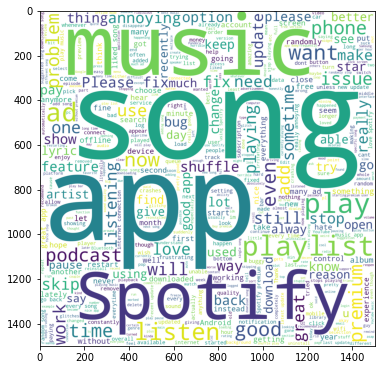

In [25]:
#visualization of neutral words
neutral = df[df['Rating'] == 'Neutral']['Review']
wc = WordCloud(width = 1500, height = 1500, background_color = 'white',max_words = 500).generate(' '.join(neutral))
plt.figure(figsize = (6,8))
plt.imshow(wc)
plt.show()

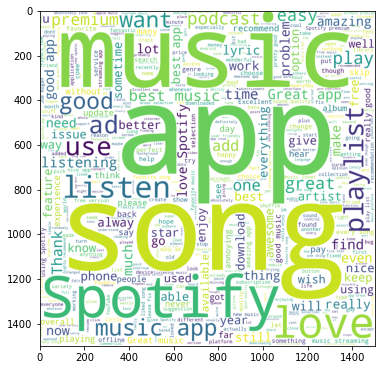

In [26]:
#visualization of positive words
good = df[df['Rating'] == 'Good']['Review']
wc = WordCloud(width = 1500, height = 1500, background_color = 'white',max_words = 500).generate(' '.join(good))
plt.figure(figsize = (6,8))
plt.imshow(wc)
plt.show()

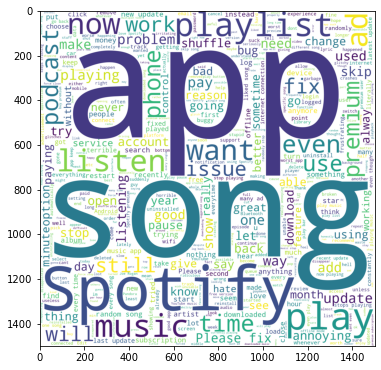

In [27]:
#visualization of negative words
bad = df[df['Rating'] == 'Bad']['Review']
wc = WordCloud(width = 1500, height = 1500, background_color = 'white',max_words = 500).generate(' '.join(bad))
plt.figure(figsize = (6,8))
plt.imshow(wc)
plt.show()

Text(0.5, 1.0, 'Thumbs ups recieved for each rating')

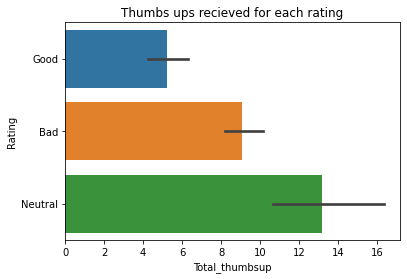

In [28]:
#representation of thumbs ups recieved for every rating
ax = sns.barplot(data = df, y = 'Rating', x = 'Total_thumbsup')
ax.set_title('Thumbs ups recieved for each rating')

In [29]:
#display of reviews in random 6 locations
for i in [0,50,100,500,1000,2000]:
    sent = df['Review'].values[i]
    print(sent)
    print('=' *100)

Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.
Podcasts becoming a nightmare. Trying to get rid of podcasts on this app is ridiculous. Stupid things are all over the home page. You can click not interested till you're blue in the face and I'll just keep throwing up more spam casts.
I love listening to music (I use it as a coping mechanism), so I love Spotify so much too. But, about 3 days ago (?), my Spotify wouldn't load, it would just stay on the spotify logo screen thing. Tried installing it and uninstalling it for 5 times, restarted my phone 2 times, cleared the cache/data for about 8 times, and I still can't open it (also waited for an hour for it to load).
I've been using Spotify since I first started using a phone. I can bear with the ads and everything but for some reason recently the music would just stop when I went to other apps and I'd have to start the song from the beginning again. It happened a couple time

In [30]:
#Preprocessing of reviews text
#tqdm library used to show progress of for loops
for i in tqdm(range(len(df))):
    df['Review'][i] = re.sub('\n', ' ', df['Review'][i])
    df['Review'][i] = re.sub('_','',df['Review'][i])
    df['Review'][i] = re.sub(r'\d+', '', df['Review'][i])
    df['Review'][i] = re.sub("[\(\[].*?[\)\]]", "", df['Review'][i])
    df['Review'][i] = re.sub("[()]",'', df['Review'][i])
    df['Review'][i] = df['Review'][i].lower()
    df['Review'][i] = contractions.fix(df['Review'][i])
    df['Review'][i] = re.sub(r'[^\w\s]', '', df['Review'][i])
    df['Review'][i] = re.sub(" +", ' ', df['Review'][i])

In [31]:
# removing stopwords and lemmatizing
stop = set(stopwords.words('english'))
lem = WordNetLemmatizer()
for i in tqdm(range(len(df))):
    t = ''
    for word in df['Review'][i].split():
        word = str(word)
        if len(word)>2:
            if word not in stop:
                t += lem.lemmatize(word) + ' '
    df['Review'][i] = t.strip()

In [32]:
#Printing those very not so random anymore reviews
for i in [0,50,100,500,1000,2000]:
    sent = df['Review'].values[i]
    print(sent)
    print('=' *100)

great music service audio high quality app easy use also quick friendly support
podcasts becoming nightmare trying get rid podcasts app ridiculous stupid thing home page click interested till blue face keep throwing spam cast
love listening music love spotify much day ago spotify would load would stay spotify logo screen thing tried installing uninstalling time restarted phone time cleared cachedata time still cannot open
using spotify since first started using phone bear ad everything reason recently music would stop went apps would start song beginning happened couple time thought okay happening much recently really getting nerve
superb like app set data usage song starting enjoing music come spotify give le ad music want give star cannot lol
easy use thanks


In [33]:
#Building a test/train split
x = df['Review']
y = df['Rating']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [34]:
#Label Encoding the target variable
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [35]:
#bag of words
count_vect = CountVectorizer()
count_vect.fit(x_train)
print(f'Some Feature Names: ', count_vect.get_feature_names()[:15])
print('=' * 50)

x_train_count = count_vect.transform(x_train)
x_test_count = count_vect.transform(x_test)
print(f'The number of unique words in test set: {x_test_count.get_shape()[1]}')

Some Feature Names:  ['aaa', 'aaah', 'aaahh', 'aaain', 'aac', 'aad', 'aada', 'aadskill', 'aah', 'aahh', 'aajata', 'aajkal', 'aal', 'aand', 'aane']
The number of unique words in test set: 21460


In [36]:
#TFIDF along with bigrams
tf_idf_vect = TfidfVectorizer(ngram_range = (1,2), min_df = 10)
tf_idf_vect.fit(x_train)
print(f'Some Feature names: {tf_idf_vect.get_feature_names()[:15]}')
print('='*50)

x_train_tfidf = tf_idf_vect.transform(x_train)
x_test_tfidf = tf_idf_vect.transform(x_test)
print(f'The number of unique words: {x_test_tfidf.get_shape()[1]}')

Some Feature names: ['aap', 'ability', 'ability download', 'ability listen', 'ability pause', 'ability play', 'ability preview', 'ability skip', 'able', 'able access', 'able add', 'able choose', 'able connect', 'able control', 'able create']
The number of unique words: 11057


In [37]:
#Classification
#Random Forest - BOW
rf1 = RandomForestClassifier()
rf1.fit(x_train_count, y_train)
rf1_cv = rf1.score(x_test_count, y_test)
print(f'Accuray for Random Forest classifiers on count vectors: {rf1_cv}')

Accuray for Random Forest classifiers on count vectors: 0.7771916113064999


In [38]:
#Random Forest-  term frequency–inverse document frequency
rf2 = RandomForestClassifier()
rf2.fit(x_train_tfidf, y_train)
rf2_cv = rf2.score(x_test_tfidf, y_test)
print(f'Accuray for Random Forest Classifier on tfidf vectors is: {rf2_cv}')

Accuray for Random Forest Classifier on tfidf vectors is: 0.7741305197342712


In [39]:
#Multinomial Naive Bayes - Bag of words
nb1 = MultinomialNB()
nb1.fit(x_train_count, y_train)
nb1_cv = nb1.score(x_test_count, y_test)
print(f'Multinomial Naive Bayes Classifier on Count Vectors: {nb1_cv}') 

Multinomial Naive Bayes Classifier on Count Vectors: 0.774716686205549


In [40]:
#Multinomial Naive Bayes - term frequency–inverse document frequency
nb2 = MultinomialNB()
nb2.fit(x_train_tfidf, y_train)
nb2_cv = nb2.score(x_test_tfidf, y_test)
print(f"Multinomial Naive Bayes Classifier on TFIDF Vectors: {nb2_cv}")

Multinomial Naive Bayes Classifier on TFIDF Vectors: 0.7806434805262472


In [41]:
#MODEL RESULTS
model = {'Model':['Random Forest Classifier - BOW', 
                  'Random Forest Classifier - TFIDF', 
                  'Multinomial NB Classifier - BOW',
                  'Multinomial NB Classifier - TFIDF'],
         'Score':[rf1_cv, rf2_cv, nb1_cv, nb2_cv]
         }
model_df = pd.DataFrame(model)
model_df

Model     Score
0     Random Forest Classifier - BOW  0.777192
1   Random Forest Classifier - TFIDF  0.774131
2    Multinomial NB Classifier - BOW  0.774717
3  Multinomial NB Classifier - TFIDF  0.780643

In [65]:
#MAKING PREDICTIONS USING TRAINED MODEL
queries = ['works well sometimes', 'UI is bad, very slow', 'Amazing application']
pred = nb2.predict(tf_idf_vect.transform(queries))
pred_transformed = le.inverse_transform(pred).tolist()
result = pd.DataFrame({'Reviews':queries, 
                       'Outcome': pred_transformed})
result

Reviews Outcome
0  works well sometimes    Good
1  UI is bad, very slow     Bad
2   Amazing application    Good